In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.model_selection import train_test_split

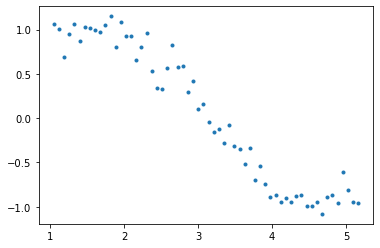

In [7]:
np.random.seed(10)

x = np.array([i*np.pi/180 for i in range(60,300,4)])

y = np.sin(x) + np.random.normal(0,0.15,len(x))

curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

plt.plot(curve['x'],curve['y'],'.')

In [8]:
def fit_poly( degree ):
    
    p = np.polyfit( curve.x, curve.y, deg = degree )
    
    curve['fit'] = np.polyval( p, curve.x )
    
    sn.regplot( curve.x, curve.y, fit_reg = False )
    
    return plt.plot( curve.x, curve.fit, label='fit' )

In [9]:
train_X, test_X, train_y, test_y = train_test_split( curve.x,
                                                  curve.y,
                                                  test_size = 0.40,
                                                  random_state = 100 )

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


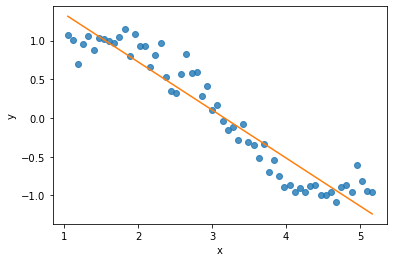

In [10]:
fit_poly(1)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


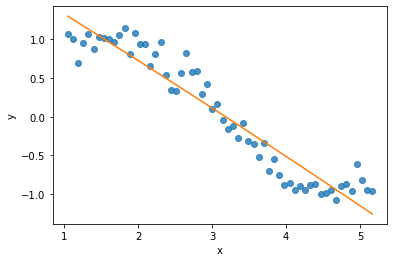

In [11]:
fit_poly(2)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


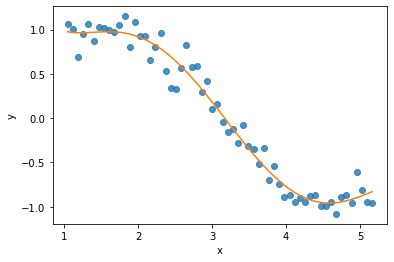

In [12]:
fit_poly(5)

<ipython-input-13-16547e9f63eb>:1: RankWarning: Polyfit may be poorly conditioned
  fit_poly(25)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


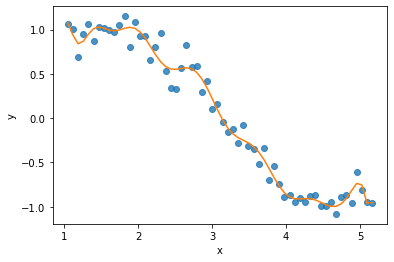

In [13]:
fit_poly(25)

In [14]:
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )

In [18]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

for i in range( 1, 25 ):
    p = np.polyfit( train_X, train_y, deg = i )
    rmse_df.loc[i-1] = [ i,
                      get_rmse( train_y, np.polyval( p, train_X ) ),
                      get_rmse( test_y, np.polyval( p, test_X ) ) ]

C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfi

In [19]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,0.231569,0.237707
1,2.0,0.229154,0.244414
2,3.0,0.115409,0.165920
3,4.0,0.113938,0.164451
4,5.0,0.110525,0.159416
5,6.0,0.105360,0.166479
6,7.0,0.104923,0.161330
7,8.0,0.104414,0.157364
8,9.0,0.100549,0.160113
9,10.0,0.100393,0.158239


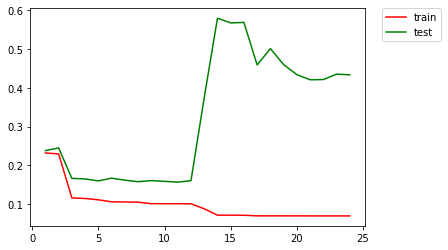

In [20]:
plt.plot( rmse_df.degree,
       rmse_df.rmse_train,
       label='train',
       color = 'r' )

plt.plot( rmse_df.degree,
       rmse_df.rmse_test,
       label='test',
       color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),
          loc=2,
          borderaxespad=0)

In [3]:
import numpy as np
from scipy.stats import norm

In [4]:
z = (2-0)/(1/np.sqrt(10))                           
print(z)

6.324555320336758


In [5]:
pvalue = 1-norm.cdf(z, loc=0, scale=1)
print(pvalue)

1.269814253745949e-10
